# 範例

取得 SIFT 特徵

- 轉成灰階圖片
- 需要額外安裝 OpenCV 相關套件

## SIFT不支援python3.8
## 這裡降版本至python3.5 
## 並 pip install opencv-python==3.4.2.16, opencv-contrib-python==3.4.2.16

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('D00_lena.png')

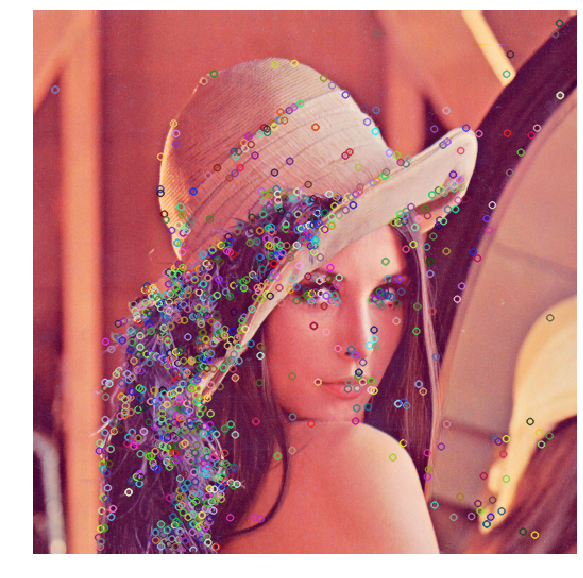

In [2]:
# 轉灰階圖片
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 建立 SIFT 物件
SIFT_detector = cv2.xfeatures2d.SIFT_create()

# 取得 SIFT 關鍵點位置
keypoints = SIFT_detector.detect(img_gray, None)

#　畫圖 + 顯示圖片
img_show = None
img_show = cv2.drawKeypoints(img, keypoints, img_show)

plt.figure(figsize = (10, 10))
plt.imshow(img_show[...,[2, 1, 0]])
plt.axis('off')
plt.show()

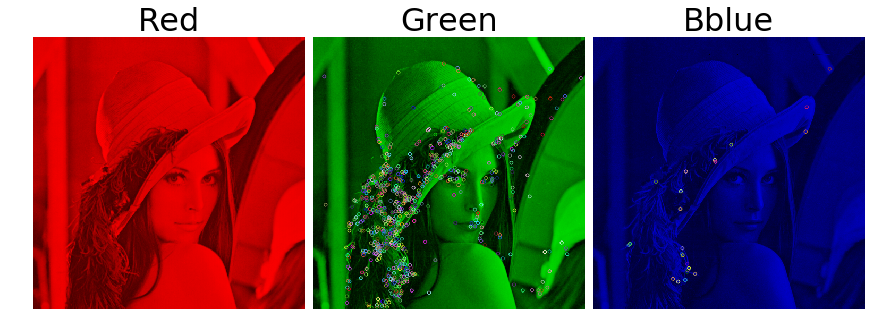

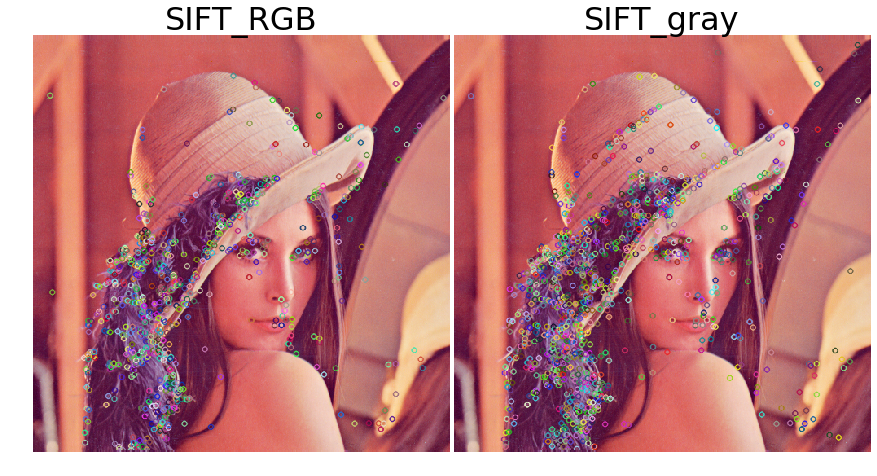

In [3]:
#　將圖片三通道分別計算特徵後輸出特徵圖

plt.figure(figsize = (15,5))
total_keypoints=[]
ch_show, RGB_show = None, None
for i,x in enumerate(['Red', 'Green', 'Bblue']):
    
    #拆開三通道
    ch = np.zeros(img.shape[:], dtype = "uint8")
    ch[..., i] = cv2.split(img)[-(i-1)+1]
    
    #轉灰階取特徵圖
    ch_gray = cv2.cvtColor(ch, cv2.COLOR_BGR2GRAY)
    ch_keypoints = SIFT_detector.detect(ch_gray, None)
    ch_show = cv2.drawKeypoints(ch, ch_keypoints, ch_show)
    
    #將各通道特徵記錄起來
    total_keypoints += ch_keypoints
    
    #畫圖輸出    
    plt.subplot(1, 3, i+1).imshow(ch_show, cmap = 'hsv')
    plt.title(x, fontsize='32')
    plt.axis('off')
plt.subplots_adjust(wspace = .01)
plt.show()

# 劃出總和的特徵圖
RGB_show = cv2.drawKeypoints(img, total_keypoints, RGB_show)

#　畫圖 + 比較特徵圖片
plt.figure(figsize = (15,20))
for i,x in enumerate({'SIFT_gray': img_show,
                      'SIFT_RGB': RGB_show,}.items()):
    plt.subplot(1, 2, i+1).imshow(x[1][...,[2, 1, 0]])
    plt.title(x[0], fontsize='32')
    plt.axis('off')
plt.subplots_adjust(wspace = .01)
plt.show()

## 如果我們把 RGB channel 個別拆開計算 SIFT 會得到跟灰階圖並不相同的特徵
### 推測是由於拆開通道轉灰階的過程資訊量有所損失。